<a href="https://colab.research.google.com/github/Krieg2065/Python/blob/main/esercitazione_geopandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [3]:
import geopandas as gpd
import pandas as pd
import contextily

In [23]:
milano = gpd.read_file("/content/drive/MyDrive/geopandas/data2/ds964_nil_wm.zip")
mezzi_trasporto = gpd.read_file("/content/drive/MyDrive/geopandas/data/tpl_percorsi_shp.zip")
mezzi_trasporto_fermate = gpd.read_file("/content/drive/MyDrive/geopandas/data/tpl_fermate_shp.zip")

In [24]:
mezzi_trasporto_fermate

,id_amat,ubicazione,linee,geometry
0,10001,"Via Matteotti, 19 prima di Via Cavour",89,POINT (9.14099 45.53151)
1,10002,"Via Cavour, 32/e dopo Via Morandi (ACI)",89,POINT (9.14446 45.53231)
2,10003,"Via Bovisasca, 18 dopo Via C.Battisti",89,POINT (9.14826 45.52691)
3,10008,"Via Bovisasca, 15/A prima di Via Baracca",89,POINT (9.14845 45.52675)
4,10009,Via Rimembranze prima di Via Cornicione,89,POINT (9.14378 45.53003)
...,...,...,...,...
4728,19891,Besta,35,POINT (9.16428 45.51895)
4729,19892,Besta,35,POINT (9.16465 45.51918)
4730,19903,Mascagni,"54,61",POINT (9.20218 45.46604)
4731,19908,Durando,82,POINT (9.16313 45.50649)


Inserisci il numero di una linea: 1


/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


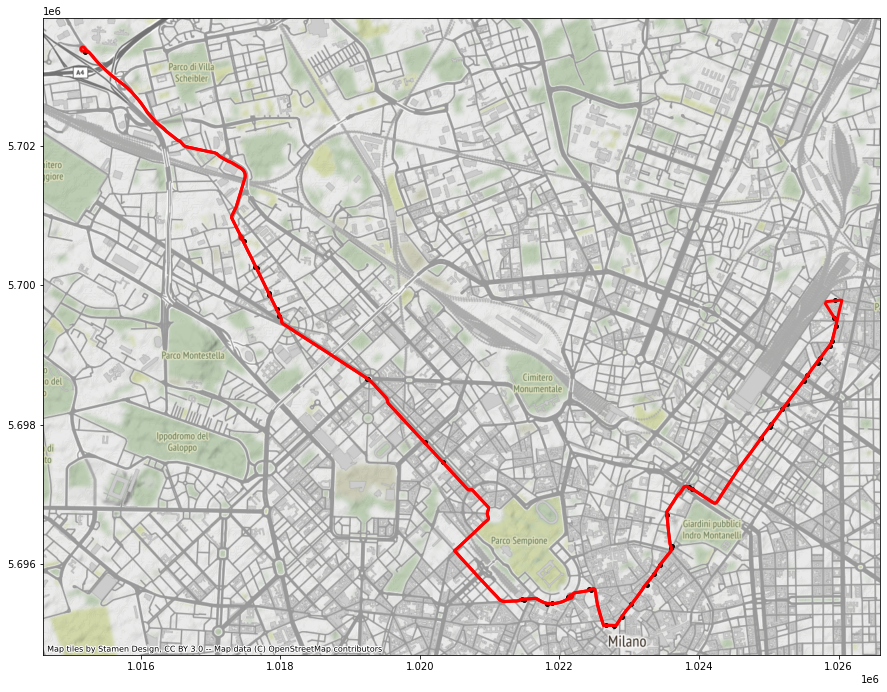

In [31]:
numLine = input("Inserisci il numero di una linea: ")

if numLine in list(mezzi_trasporto.linea):
  linea= mezzi_trasporto[mezzi_trasporto["linea"] == numLine]
  fermate = mezzi_trasporto_fermate[mezzi_trasporto_fermate['linee'] == numLine]
  milanoLine = linea[linea.intersects(milano.geometry.squeeze())]
  ax = milanoLine.to_crs(epsg=3857).plot(figsize=(15,15))
  linea.to_crs(epsg=3857).plot(ax=ax, color= "r",linewidth = 3)
  fermate.to_crs(epsg=3857).plot(ax=ax, color= "k",markersize = 15)
  contextily.add_basemap(ax)
else:
  print("linea non trovata")

data una via dal utente trovare le line e le fermate di quelle linee e visualizzarle su una mappa

In [15]:
via = input("Inserisci il numero di una linea: ")

if numLine in list(mezzi_trasporto.linea):
  linea= mezzi_trasporto[mezzi_trasporto["linea"] == numLine]
  fermate = mezzi_trasporto_fermate[mezzi_trasporto_fermate['linee'] == numLine]
  milanoLine = linea[linea.intersects(milano.geometry.squeeze())]
  ax = milanoLine.to_crs(epsg=3857).plot(figsize=(15,15))
  linea.to_crs(epsg=3857).plot(ax=ax, color= "r",linewidth = 3)
  fermate.to_crs(epsg=3857).plot(ax=ax, color= "k",markersize = 15)
  contextily.add_basemap(ax)
else:
  print("linea non trovata")

,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,TRAM,9457,As,Greco - Roserio,Canonico,13.97,47,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
